In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()

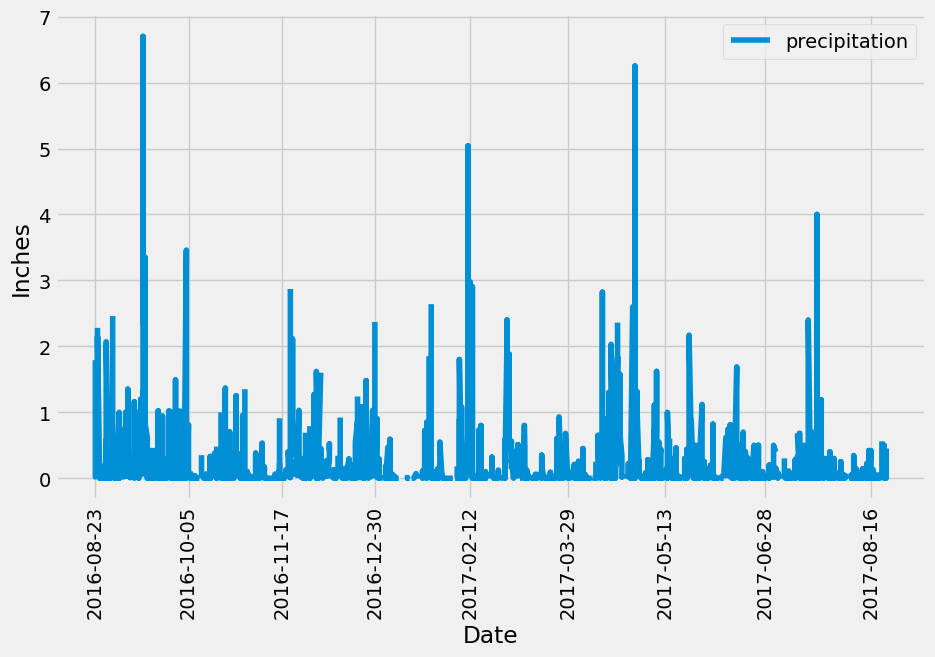

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measurement.date).order_by(measurement.date.desc()).first()
# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rows = [{'Date': result[0], 'Precipitation': result[1]} for result in results]
rain_df = pd.DataFrame(rows).set_index('Date')
rain_df

# Sort the dataframe by date
rain_df = pd.DataFrame(rows).set_index('Date').sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.index = pd.to_datetime(rain_df.index)

subset_dates = rain_df.index[::275]
plt.figure(figsize=(10, 6))
plt.plot(rain_df.index, rain_df['Precipitation'],label='precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(subset_dates, rotation=90)
plt.legend()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).distinct().count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station).order_by(func.count(measurement.date).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

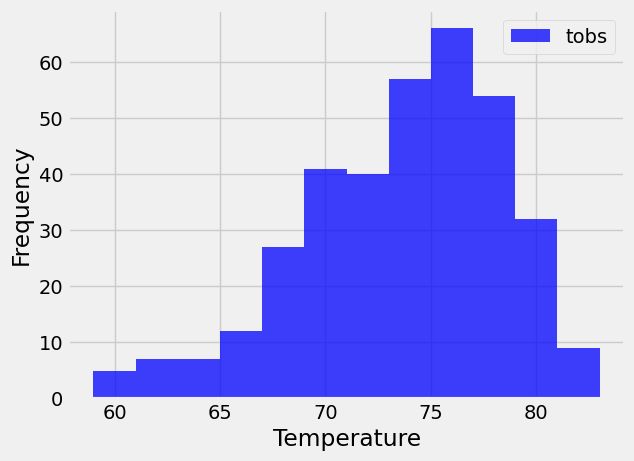

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(measurement.date).filter(measurement.station == 'USC00519281').order_by(measurement.date.desc()).first()
new_one_year = dt.date(2017, 8, 18) - dt.timedelta(days=365)
station_results = session.query(measurement.tobs).filter(measurement.date >= new_one_year).filter(measurement.station == 'USC00519281').all()
new_rows = [{'Temperature': result[0]} for result in station_results]
temp_df = pd.DataFrame(new_rows)
temp_df
temp_chart = plt.hist(temp_df, bins=12, color='b', alpha=.75, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Close Session

In [16]:
# Close Session
session.close()